<Axes: xlabel='X0', ylabel='X1'>

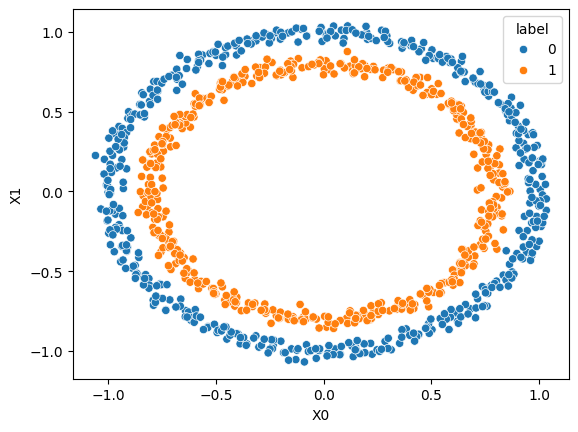

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
n_samples = 1000
X,y = make_circles(n_samples,
noise = 0.03,
random_state=42)
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
sns.scatterplot(data=circles,x="X0",y="X1",hue="label")


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
model = tf.keras.Sequential([
tf.keras.layers.Dense(16,activation='relu',input_shape=(2,)),
tf.keras.layers.Dense(8,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')])

C:\Users\GF LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
loss='binary_crossentropy',
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4908 - loss: 0.6947   
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6496 - loss: 0.6851 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.5274 - loss: 0.6717
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8241 - loss: 0.6525
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7180 - loss: 0.6022
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8573 - loss: 0.5360
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9414 - loss: 0.4539 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9601 - loss: 0.3592
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.9618 - loss: 0.2954
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9912 - loss: 0.2283


Text(0, 0.5, 'Loss Value')

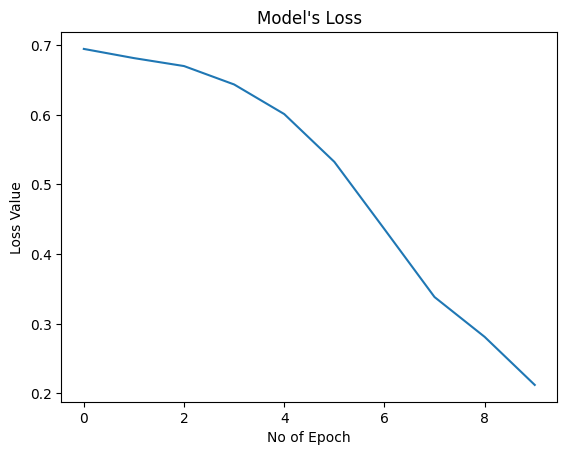

In [9]:
plt.title("Model's Loss")
plt.plot(history.history['loss'])
plt.xlabel("No of Epoch")
plt.ylabel("Loss Value")

In [10]:
def plotq(model,X,y):
    x_min,x_max = X[:,0].min()- 0.1,X[:,0].max() + 0.1
    y_min , y_max = X[:,1].min()-0.1 ,X[:,1].max()+0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
    np.linspace(y_min,y_max,100))
    x_in = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(x_in)
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary")
        y_pred = np.round(y_pred).reshape(xx.shape)
        plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
        plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
        plt.xlim(xx.min(),xx.max())
        plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
doing binary
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
doing binary


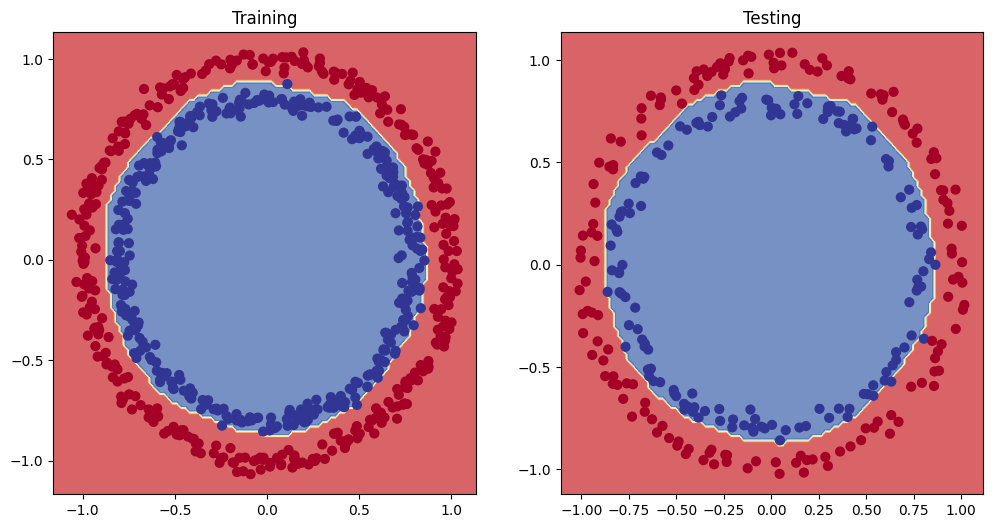

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plotq(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plotq(model,X_test,y_test)